In [ ]:
# Jacques TELLIER 20200858 #

In [ ]:
#--------------------------------------- DATA SET 1 -------------------------------------------------#

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("uber-raw-data-apr14.csv")

In [3]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%m/%d/%Y %H:%M:%S")

In [4]:
def get_dom(dt): 
    return dt.day
df['dom'] = df['Date/Time'].map(get_dom)

In [5]:
def get_weekday(dt): 
    return dt.weekday()
df['weekday']= df['Date/Time'].map(get_weekday)

In [6]:
print(df["dom"])

0          1
1          1
2          1
3          1
4          1
          ..
564511    30
564512    30
564513    30
564514    30
564515    30
Name: dom, Length: 564516, dtype: int64


In [7]:
import numpy as np
import matplotlib.pyplot as plt

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <BarContainer object of 30 artists>)

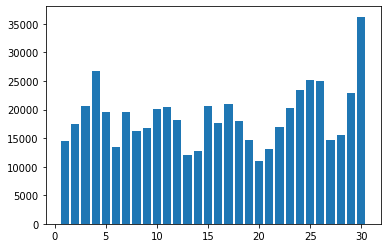

In [8]:
plt.hist(x=df["dom"], bins=30, rwidth=0.8, range=(0.5, 30.5))

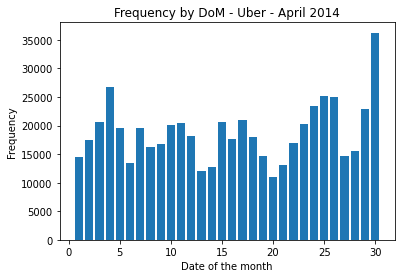

In [9]:
plt.hist(x=df["dom"], bins=30, rwidth=0.8, range=(0.5, 30.5))
plt.title("Frequency by DoM - Uber - April 2014")
plt.xlabel("Date of the month")
plt.ylabel("Frequency")
plt.show()

In [10]:
def count_rows(rows):
    return len(rows)
grpby = df.groupby(df['dom']).apply(count_rows)

<AxesSubplot:xlabel='dom'>

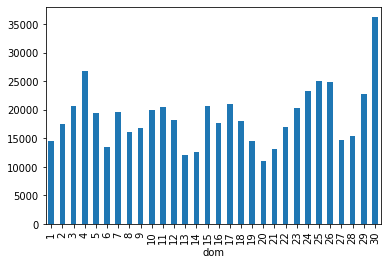

In [11]:
grpby.plot.bar()

<AxesSubplot:xlabel='dom'>

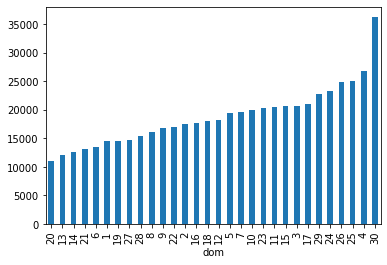

In [12]:
grpby = grpby.sort_values()
grpby.plot.bar()

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

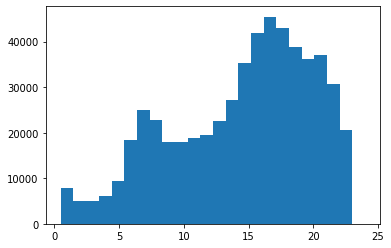

In [13]:
plt.hist(df["Date/Time"].dt.hour, bins=24, range=(0.5, 24))

(array([ 60861.,  91185., 108631.,  85067.,  90303.,  77218.,  51251.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <BarContainer object of 7 artists>)

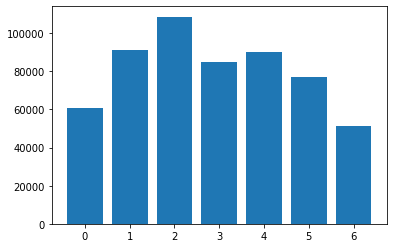

In [14]:
plt.hist(df["weekday"], bins=7, rwidth=0.8, range=(-0.5, 6.5))

([<matplotlib.axis.XTick at 0x1d224b68070>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

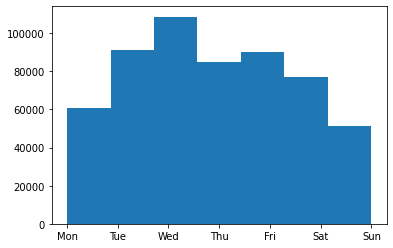

In [15]:
plt.hist(x=df.weekday, bins=7, range=(0,6))
plt.xticks(np.arange(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

In [16]:
df['hour']= df['Date/Time'].dt.hour
grpby2 = df.groupby(['weekday', 'hour']).apply(count_rows).unstack()
print(grpby2)

hour       0     1     2     3     4     5     6     7     8     9   ...  \
weekday                                                              ...   
0         518   261   238   571  1021  1619  2974  3888  3138  2211  ...   
1         765   367   304   516   887  1734  3766  5304  4594  2962  ...   
2         899   507   371   585  1003  1990  4230  5647  5242  3846  ...   
3         792   459   342   567   861  1454  3179  4159  3616  2654  ...   
4        1367   760   513   736   932  1382  2836  3943  3648  2732  ...   
5        3027  2479  1577  1013   706   704   844  1110  1372  1764  ...   
6        4542  2936  1590  1052   685   593   669   873  1233  1770  ...   

hour       14    15    16    17    18    19    20    21    22    23  
weekday                                                              
0        3117  3818  4962  5574  4725  4386  3573  3079  1976  1091  
1        4489  6042  7521  8297  7089  6459  6310  5993  3614  1948  
2        5438  7071  8213  9151  83

In [17]:
import seaborn as sb

<AxesSubplot:xlabel='hour', ylabel='weekday'>

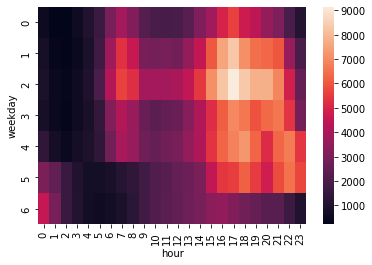

In [18]:
sb.heatmap(grpby2)

Text(0, 0.5, 'Frequency')

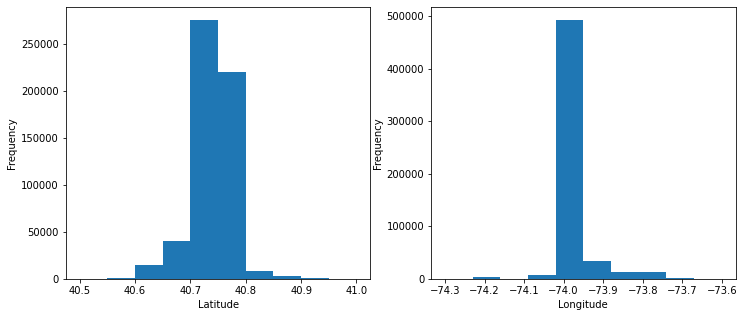

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))
ax1.hist(df["Lat"], range=(40.5, 41))
fig.suptitle("")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Frequency")

ax2.hist(df["Lon"], range=(-74.3, -73.6))
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

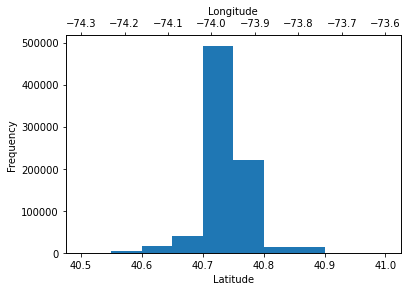

In [20]:
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

ax1.hist(df["Lat"], range=(40.5, 41))
fig.suptitle("")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Frequency")

ax2.hist(df["Lon"], range=(-74.3, -73.6))
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Frequency")

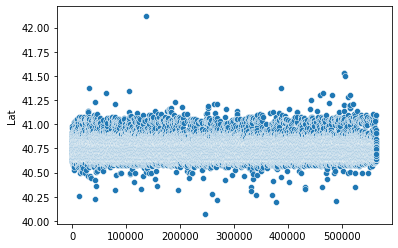

In [21]:
ax3 = sb.scatterplot(data=df["Lat"])